#Importing DataSet

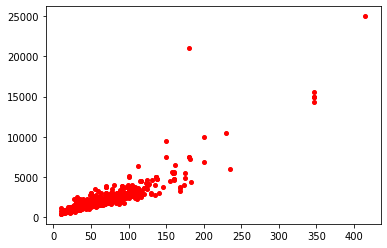

In [221]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# On charge le dataset
house_data = pd.read_csv('house_data.csv')

# On affiche le nuage de points dont on dispose
plt.plot(house_data['surface'], house_data['price'], 'ro', markersize=4)
plt.show()

#Cleaning

In [222]:
house_data = house_data[house_data['price'] < 10000]

In [223]:
house_data.head()

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


#6 Features Model

In [224]:
data = house_data.copy()
target = data.pop('price')

##One Hot Encoding

In [225]:
import pandas as pd

df = pd.DataFrame(data)
one_hot_encoded_data = pd.get_dummies(data, columns = ['arrondissement'])
one_hot_encoded_data  
print(one_hot_encoded_data)

     surface  arrondissement_1.0  arrondissement_2.0  arrondissement_3.0  \
0      46.10                   1                   0                   0   
1      41.00                   1                   0                   0   
2      55.00                   1                   0                   0   
3      46.00                   1                   0                   0   
4      49.00                   1                   0                   0   
..       ...                 ...                 ...                 ...   
822    35.00                   0                   0                   0   
823    10.00                   0                   0                   0   
824    34.00                   0                   0                   0   
825    65.00                   0                   0                   0   
826    21.43                   0                   0                   0   

     arrondissement_4.0  arrondissement_10.0  
0                     0                 

##Cleaning

In [226]:
d = np.array(one_hot_encoded_data)
d[np.isnan(d)] = 0

t = np.array(target)
t.shape = (t.shape[0], 1)
t[np.isnan(t)] = 0

In [227]:
print(house_data.head())

   price  surface  arrondissement
0   1820     46.1             1.0
1   1750     41.0             1.0
2   1900     55.0             1.0
3   1950     46.0             1.0
4   1950     49.0             1.0


In [228]:

one_hot_encoded_data = pd.get_dummies(house_data, columns = ['arrondissement'])
print(one_hot_encoded_data.head())

   price  surface  arrondissement_1.0  arrondissement_2.0  arrondissement_3.0  \
0   1820     46.1                   1                   0                   0   
1   1750     41.0                   1                   0                   0   
2   1900     55.0                   1                   0                   0   
3   1950     46.0                   1                   0                   0   
4   1950     49.0                   1                   0                   0   

   arrondissement_4.0  arrondissement_10.0  
0                   0                    0  
1                   0                    0  
2                   0                    0  
3                   0                    0  
4                   0                    0  


In [229]:
print(house_data.corr())

                   price   surface  arrondissement
price           1.000000  0.904202       -0.236439
surface         0.904202  1.000000       -0.111122
arrondissement -0.236439 -0.111122        1.000000


In [230]:
print(one_hot_encoded_data.corr())

                        price   surface  arrondissement_1.0  \
price                1.000000  0.904202            0.203018   
surface              0.904202  1.000000            0.149433   
arrondissement_1.0   0.203018  0.149433            1.000000   
arrondissement_2.0  -0.088888 -0.114485           -0.211849   
arrondissement_3.0  -0.010762 -0.010093           -0.254251   
arrondissement_4.0   0.135862  0.076703           -0.256098   
arrondissement_10.0 -0.237484 -0.108580           -0.253327   

                     arrondissement_2.0  arrondissement_3.0  \
price                         -0.088888           -0.010762   
surface                       -0.114485           -0.010093   
arrondissement_1.0            -0.211849           -0.254251   
arrondissement_2.0             1.000000           -0.226773   
arrondissement_3.0            -0.226773            1.000000   
arrondissement_4.0            -0.228420           -0.274139   
arrondissement_10.0           -0.225948           -0.2

##Splitting the Data

In [231]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(d, t, train_size=0.8)

In [232]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(654, 6)
(164, 6)
(654, 1)
(164, 1)


##Modeling

In [233]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression()

##Evaluation

In [234]:

predicted = regr.predict(xtest)

In [235]:
print(regr.score(xtest, ytest))

0.8778579190203417


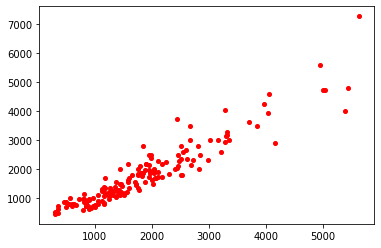

In [236]:
plt.plot(predicted, ytest, 'ro', markersize=4)
plt.show()

#1 Feature Model

##Cleaning

In [237]:
data = house_data['surface']
target = house_data['price']

d = np.array(data)
d.shape = (d.shape[0], 1)
d[np.isnan(d)] = 0

t = np.array(target)
t.shape = (t.shape[0], 1)
t[np.isnan(t)] = 0
print(t.shape)

(818, 1)


##Splitting the Data

In [238]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(d, t, train_size=0.8)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(654, 1)
(164, 1)
(654, 1)
(164, 1)


##Modeling, Training and Evaluation

In [239]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

predicted = regr.predict(xtest)

In [240]:
print(regr.score(xtest, ytest))

0.8128074026451754


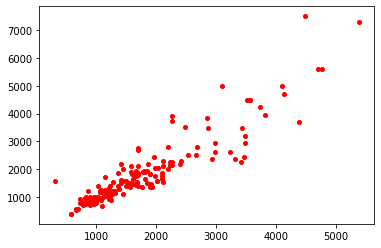

In [241]:
plt.plot(predicted, ytest, 'ro', markersize=4)
plt.show()